Package Imports

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../scripts/')
from datacleaner import DataCleaner
from utils import Utils
from plotter import Plotter
from scipy.stats import skew

In [3]:
utils = Utils()
plotter = Plotter()


Load Data

In [4]:
data = utils.load_data('../data/data.csv')


Initial version of data can be loaded from dvc using  
tag : v1  
filename : data.csv  
repo : https://github.com/teddyk251/causal-inference  

In [5]:
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Column Unnamed:32 contains null values and should be removed. The diagnosis column is the target columns and is also a categorical column. The id column only serves as an identifier and will not be needed for the analysis.

In [7]:
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)


In [8]:
data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Before visualizing we need to standardize and normalize the features. The differences between values of features are very high. 

# Univariate Analaysis

Our target feature is diagnosis and it is the only categorical feature

In [10]:
data['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

Benign is 357 cases  
Malignant is 212 cases

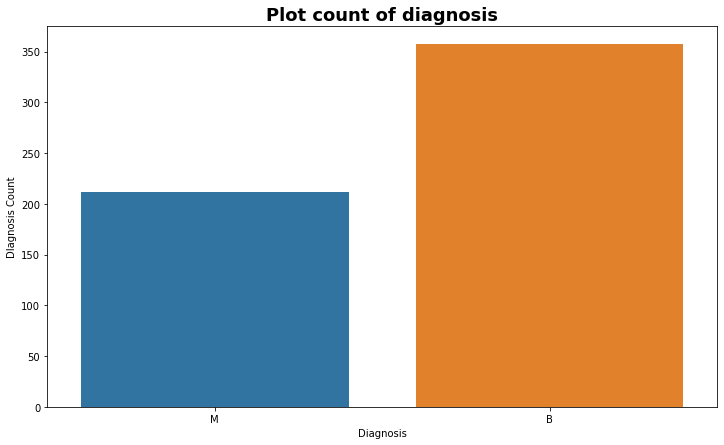

In [14]:
plt.figure(figsize=(12, 7))
sns.countplot(data=data, x='diagnosis')
plt.title(f'Plot count of diagnosis', size=18, fontweight='bold')
plt.xlabel('Diagnosis')
plt.ylabel('DIagnosis Count')
plt.show()


Extract the features and the target 

In [16]:
y = data.diagnosis  # M or B
x = data.drop(['diagnosis'], axis=1)


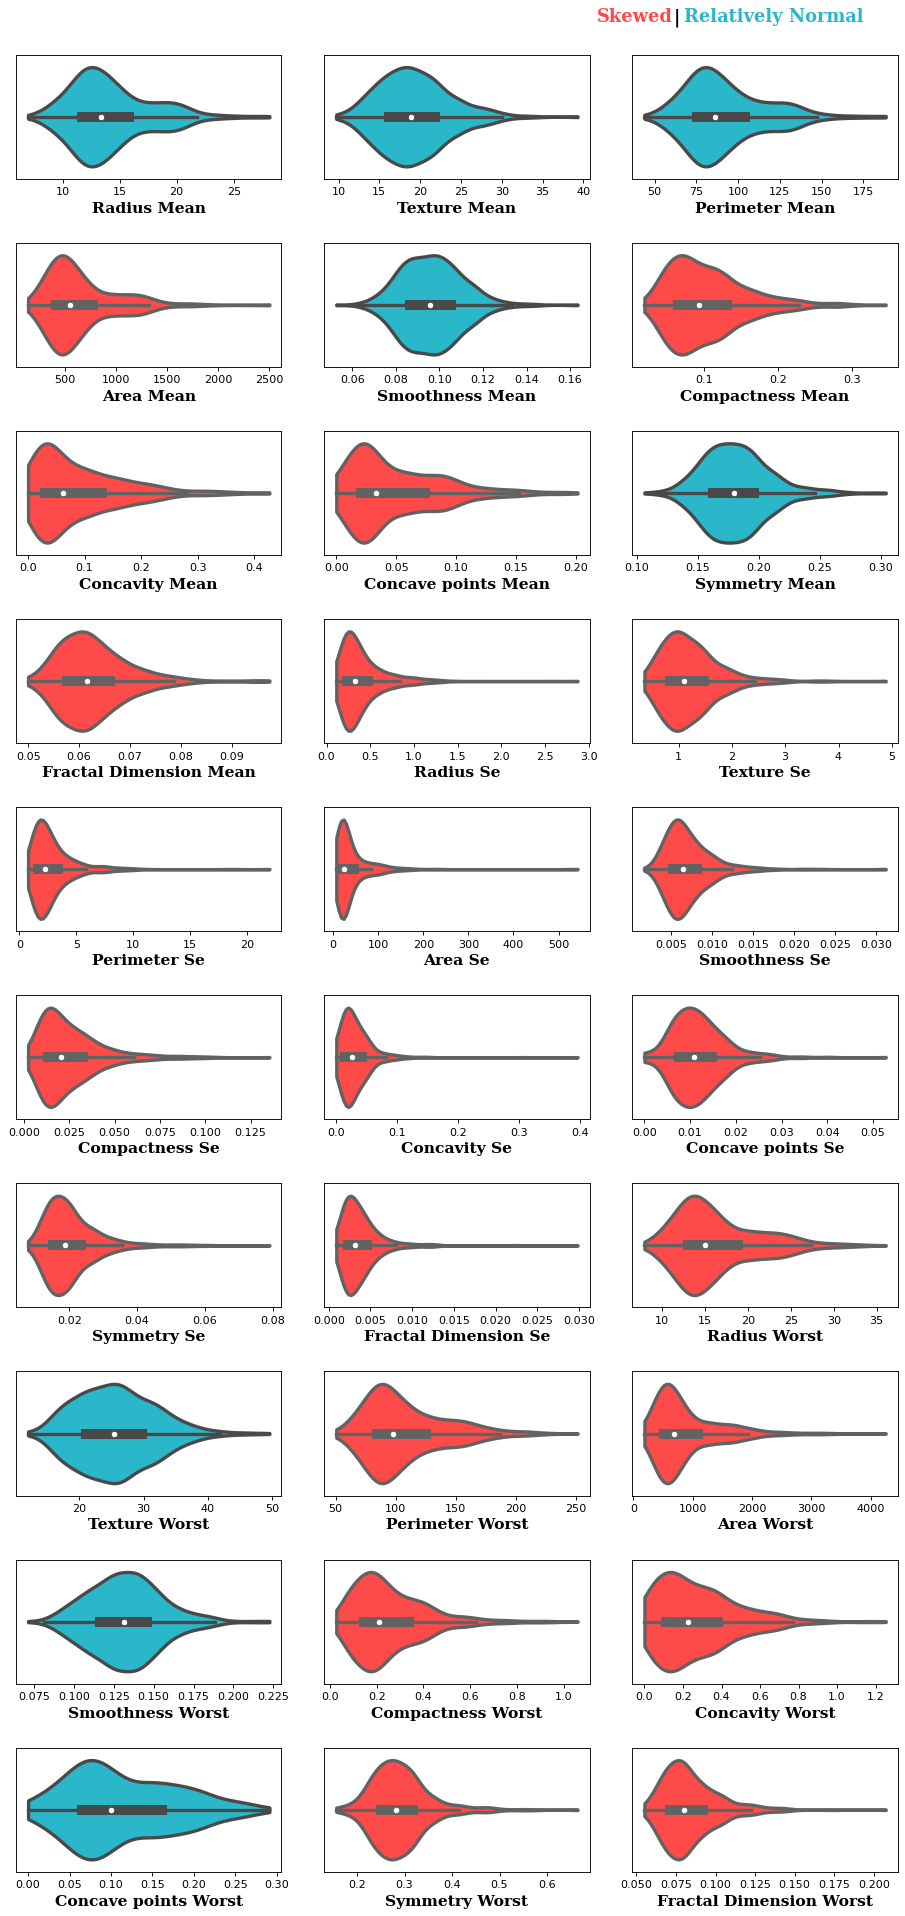

In [19]:
colors = ['#fe4a49', '#2ab7ca', '#fed766', '#e6e6ea', '#f4f4f8']
fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(12, 24), dpi=80)
axes = ax.ravel()

for col, ax in zip(x.columns, axes):
    # skewness
    if skew(x[col]) > 1:
        color = colors[0]
    else:
        color = colors[1]

    # plots
    sns.violinplot(x[col], ax=ax,
                   color=color, cut=0,
                   inner='box',
                   alpha=1, linewidth=3, edgecolor='solidblack', saturation=1)

    # plot setting
    xlabel = ' '.join([value.capitalize() for value in str(col).split('_')])
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.set_xlabel(
        xlabel, {'font': 'serif', 'size': 14, 'weight': 'bold'}, alpha=1)

plt.tight_layout(pad=3, h_pad=2.5, w_pad=2.5)

fig.text(0.65, 1, "Skewed", {'font': 'serif',
         'size': 16, 'weight': 'bold', 'color': colors[0]})
fig.text(0.73, 1, '|', {'font': 'serif', 'size': 16, 'weight': 'bold'})
fig.text(0.74, 1, "Relatively Normal", {
         'font': 'serif', 'size': 16, 'weight': 'bold', 'color': colors[1]})

fig.show()


From the above plot we can see features which are skewed colored red and features with a normal distribution colored in blue

# Bivariate Analysis

## Diagnosis vs other features

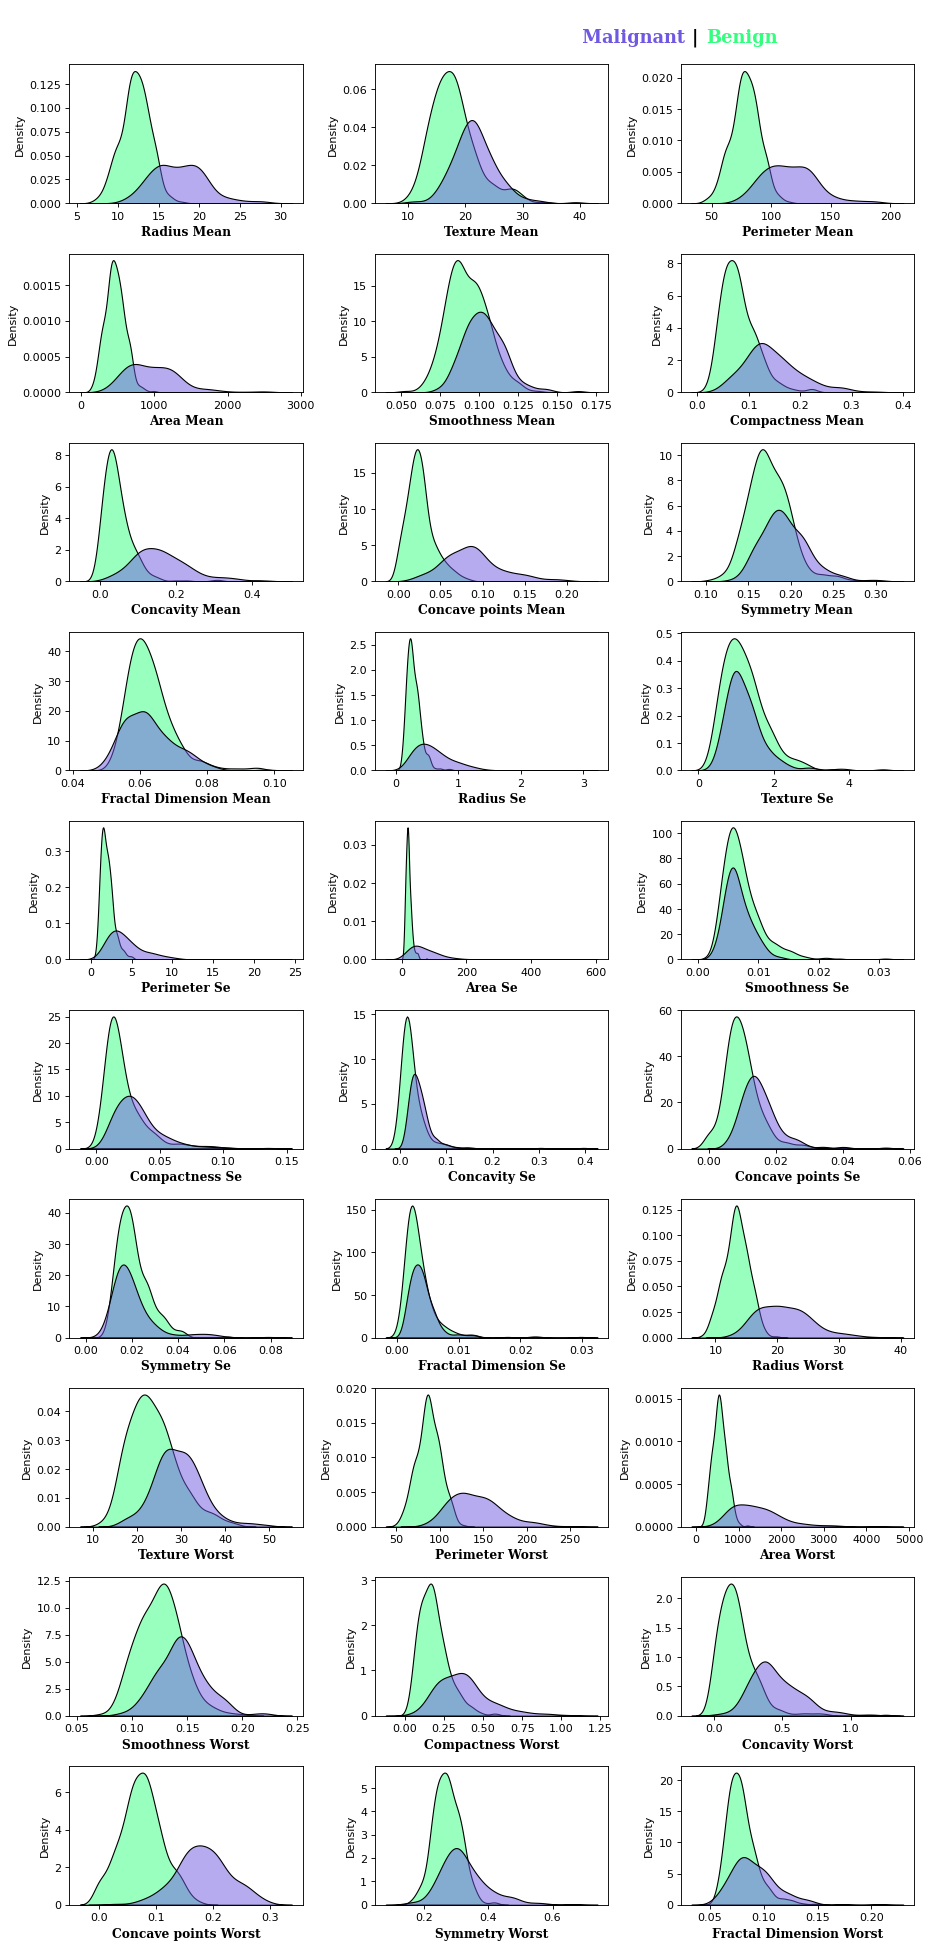

In [21]:
fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(12, 24), dpi=80)
axes = ax.ravel()

for col, ax in zip(x.columns, axes):
    # plots
    sns.kdeplot(data[col], ax=ax, shade=True,
                palette=["#7158e2", "#32ff7e"],
                alpha=0.5, linewidth=1, ec='black',
                hue=data['diagnosis'], hue_order=['M', 'B'],
                legend=False)

    # plot setting
    xlabel = ' '.join([value.capitalize() for value in str(col).split('_')])
    ax.axes.set_xlabel(
        xlabel, {'font': 'serif', 'size': 11, 'weight': 'bold'}, alpha=1)

plt.tight_layout(pad=2, h_pad=1, w_pad=1)

fig.text(0.615, 1, "\n Malignant", {
         'font': 'serif', 'size': 16, 'weight': 'bold', 'color': "#7158e2"}, alpha=1)
fig.text(0.735, 1, '|', {'font': 'serif', 'size': 16, 'weight': 'bold'})
fig.text(0.75, 1, "Benign", {'font': 'serif', 'size': 16,
         'weight': 'bold', 'color': "#32ff7e"}, alpha=1)

fig.show()


# Correlation

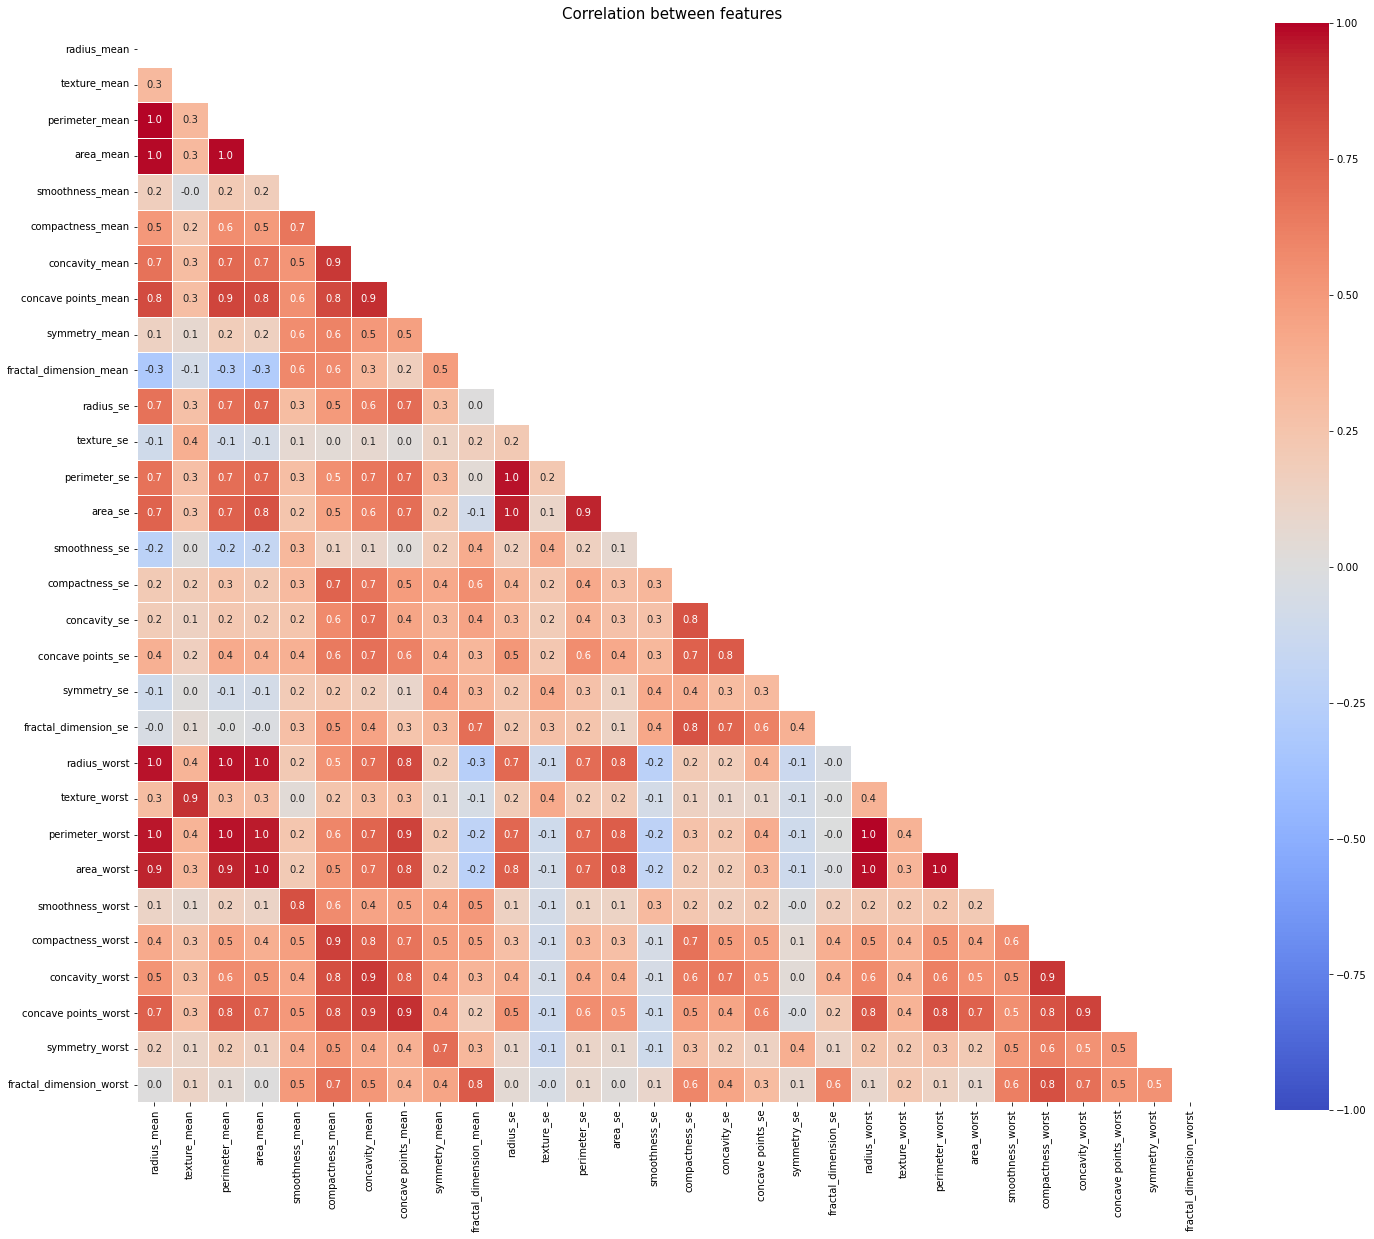

In [36]:
corr = x.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(24, 20))
heatmap = sns.heatmap(corr, mask=mask, square=True, linewidths=.5,
                        vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.1f')
heatmap.set_title('Correlation between features',
                    fontdict={'fontsize': 15}, pad=12)
fig.show()